In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

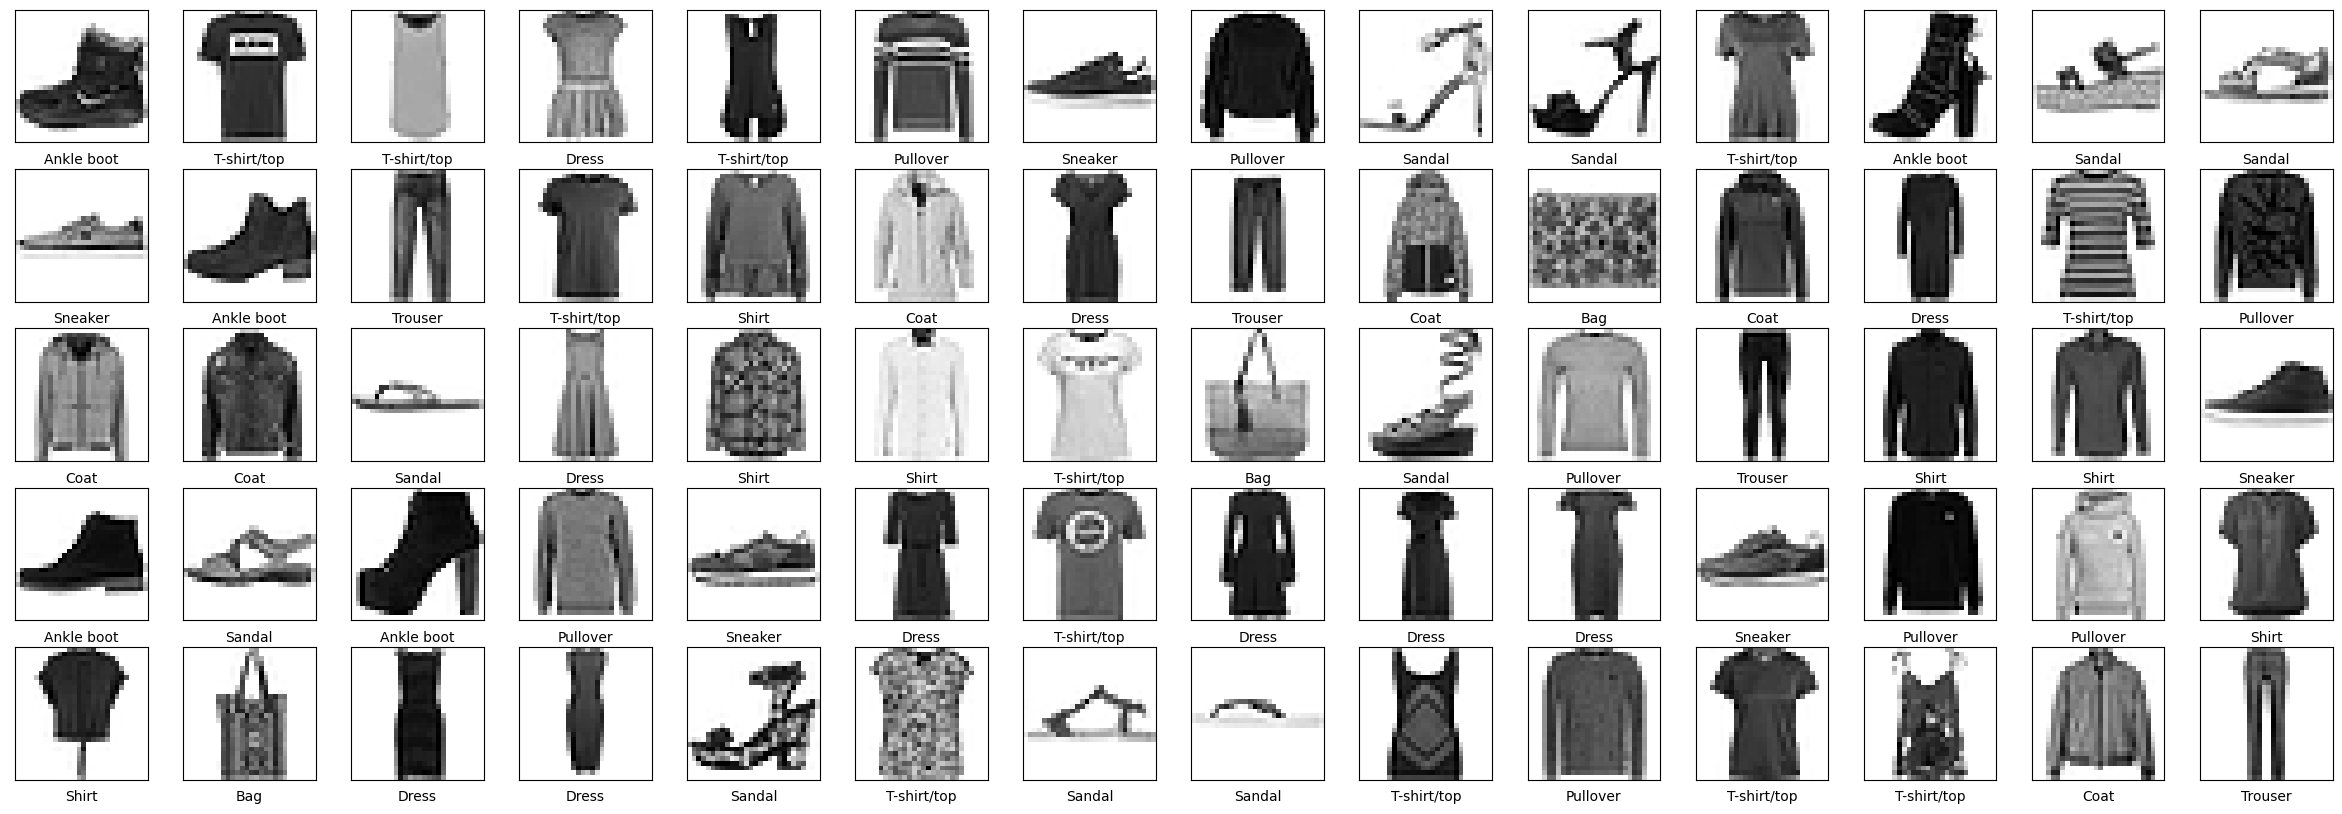

In [8]:
# plot some data
plt.figure(figsize=(30,10))

for i in range(70):
    plt.subplot(5,14,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:

x_train = np.expand_dims(train_images, 
                         axis=-1)
y_train = tf.keras.utils.to_categorical(train_labels, 
                                        num_classes=len(class_names))
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)), 

    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),  
    
    tf.keras.layers.Flatten(), 
     
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4099 - accuracy: 0.8542
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2699 - accuracy: 0.9022
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2233 - accuracy: 0.9181
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1884 - accuracy: 0.9302
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1565 - accuracy: 0.9416
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1330 - accuracy: 0.9504
Epoch 7/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1124 - accuracy: 0.9578
Epoch 8/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0915 - accuracy: 0.9650
Epoch 9/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0784 - accuracy: 0.9707
Epoch 10/20
1875/1875 [==============================] - 19s 10m

In [7]:
x_test = np.expand_dims(train_images, 
                        axis = -1)
y_test = tf.keras.utils.to_categorical(train_labels, 
                                       num_classes=len(class_names))


test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0151 - accuracy: 0.9950
Test accuracy: 0.9949666857719421


In [9]:
predicted_classes = model.predict(x_test)

1875/1875 [==============================] - 6s 3ms/step
